<a href="https://colab.research.google.com/github/KONDAIAHGARISHANTHAN/Pysliq-Data-Scientist/blob/main/Titanic_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/content/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.duplicated().sum()

0

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [8]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [9]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [10]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [11]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [14]:
len(X_train)

712

In [15]:
len(X_test)

179

In [16]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [17]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
model.score(X_test,y_test)

0.7597765363128491

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred=lr.predict(X_test)

In [23]:
accuracy_score(y_test,y_pred)

0.7988826815642458

In [25]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[92 18]
 [18 51]]


<Axes: title={'center': 'Confusion Matrix'}>

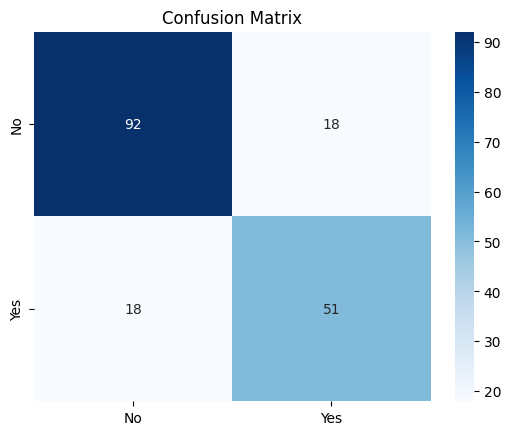

In [27]:
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])